In [13]:
# Yb-171 #

from sympy.physics.wigner import wigner_3j
from sympy.physics.wigner import wigner_6j
from numpy import*
import matplotlib.pyplot as plt
import scipy.constants as C

# 定义常数(556) #

hbar = C.h/(2*pi)  # 约化普朗克常数
a0 = 5.2917721067e-11  # 玻尔半径
epsilon0 = 8.854e-12 # 真空介电常数
K = [0,1,2]
n = 6
I = 1/2  # Yb-171
J = [0,1]
F = [1/2,3/2]  # Yb-171
gamma = 2*pi*183.8e3  # 自然线宽
stan_freq = 539390406.83  # 基频(MHz): 1/2-3/2
delta_freq = -5936.671  # 频率差(MHz): 1/2-1/2
omega = array([2e6*pi*(stan_freq+delta_freq),2e6*pi*stan_freq],dtype=float64)  # 1S_0 - 3P_1 : F = 1/2，F = 3/2

# 跃迁矩阵元 #
#product_J = 0.54*a0*C.e  # <1S_0||d||3P_1>
#print('<1S_0||d||3P_1> = %.5e\n'%product_J)


In [14]:
# For 399 Transition #


StanFreq1 = 751526533.49  # 基频(MHz): Yb-174
DeltaFreq1 = array([1153.68,835.19],dtype=float64)  # 1S_0 - 1P_1 : F = 1/2，F = 3/2
Omega1 = 2e6*pi*DeltaFreq1  # S.I.
#ProductJ1 = 4.15*a0*C.e  # <1S_0||d||1P_1>
#print('<1S_0||d||1P_1> = %.5e\n'%ProductJ1)

# Trap #

LightOmega = 2e9*pi*C.c/1036


In [15]:
# 跃迁矩阵元 #
# [1P_1, 3P_1] #

Gamma = array([2e6*pi*29.13 , 2e3*pi*183.8],dtype=float64)  # natural linewidth [Hz]
Omega0 = array([2e6*pi*751526533.49 , 2e6*pi*539390406.83],dtype=float64)  # frequency [2pi*Hz]
para = 3*pi*epsilon0*hbar*(C.c**3)*(2*J[1]+1)/(C.e**2)

ProductJ1 = sqrt(para*Gamma[0]/(Omega0[0]**3))*C.e  # <1S_0||d||1P_1>
product_J = sqrt(para*Gamma[1]/(Omega0[1]**3))*C.e  # <1S_0||d||3P_1>

print('<1S_0||d||1P_1> = %.5e\n'%ProductJ1)
print('<1S_0||d||3P_1> = %.5e\n'%product_J)


<1S_0||d||1P_1> = 3.51649e-29

<1S_0||d||3P_1> = 4.59381e-30



In [16]:
# 定义函数：reduced polarizability #


def Alpha_K_F(light_omega,omega):
    detune = zeros(len(omega))
    for omega_num in range(len(omega)):
        detune[omega_num] = light_omega - omega[omega_num]
    alpha = zeros(len(K))
    for K_num in range(len(K)):
        term = 0
        for F_num in range(len(F)):
            term = term + (-1)**(F[F_num]+F[0])*(2*F[F_num]+1)*wigner_6j(1,K[K_num],1,F[0],F[F_num],F[0])\
            *(wigner_6j(F[0],1,F[F_num],J[1],I,J[0]))**2\
            *(1/hbar)*(-detune[F_num]/(detune[F_num]**2+(gamma/2)**2))
        alpha[K_num] = ((-1)**(K[K_num]+1))*(2*F[0]+1)*sqrt(2*K[K_num]+1)*(product_J**2)*term
    return alpha


In [17]:
# conventional polarizability #


# 自变量输入 #

detune = -798.3  # 失谐(MHz)
light_omega = 2e6*pi*(stan_freq+detune)
alpha_K = Alpha_K_F(light_omega,omega)


# conventional scalar polarizability
def Alpha_s_F(light_omega,omega):
    alpha_K = Alpha_K_F(light_omega,omega)
    alpha_s_F = 1/sqrt(3*(2*F[0]+1))*alpha_K[0]
    return alpha_s_F

alpha_s_F = Alpha_s_F(light_omega,omega)
print('alpha_0_F is %.7e'%alpha_K[0])
print('alpha_s_F is %.7e\n'%alpha_s_F)


# conventional vector polarizability
def Alpha_v_F(light_omega,omega):
    alpha_K = Alpha_K_F(light_omega,omega)
    alpha_v_F = -sqrt(2*F[0]/((F[0]+1)*(2*F[0]+1)))*alpha_K[1]
    return alpha_v_F

alpha_v_F = Alpha_v_F(light_omega,omega)
print('alpha_1_F is %.7e'%alpha_K[1])
print('alpha_v_F is %.7e\n'%alpha_v_F)


# conventional tensor polarizability

def Alpha_T_F(light_omega,omega):
    alpha_K = Alpha_K_F(light_omega,omega)
    alpha_T_F = -sqrt(2*F[0]*(2*F[0]-1)/(3*(F[0]+1)*(2*F[0]+1)*(2*F[0]+3)))*alpha_K[2]
    return alpha_T_F

alpha_T_F = Alpha_T_F(light_omega,omega)
print('alpha_2_F is %.7e'%alpha_K[2])
print('alpha_T_F is %.7e'%alpha_T_F)


alpha_0_F is 2.0029437e-35
alpha_s_F is 8.1769833e-36

alpha_1_F is -1.7741476e-35
alpha_v_F is 1.0243046e-35

alpha_2_F is 0.0000000e+00
alpha_T_F is -0.0000000e+00


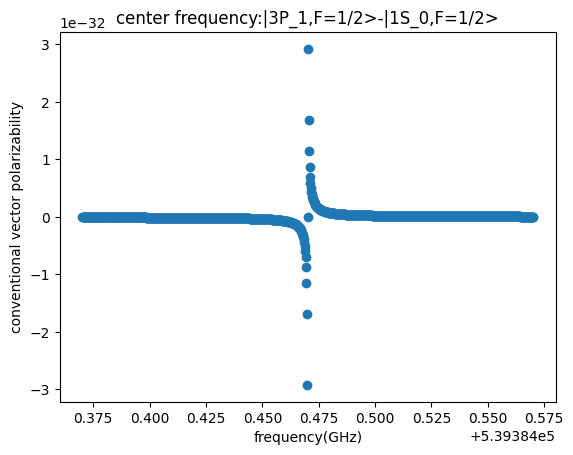

In [6]:
# 极化率随失谐变化 #


# F=1/2态 #

step_num = 1000
wavelen1 = C.c/(omega[0]/(2*pi*10**9)-0.1)  # (nm)
wavelen2 = C.c/(omega[0]/(2*pi*10**9)+0.1)  # (nm)
step = (wavelen2-wavelen1)/step_num
Light_wavelen = [0 for i in range(step_num+1)]
Light_fre = Light_wavelen
y = [0 for i in range(step_num+1)]
for i in range(step_num+1):
    Light_wavelen[i] = wavelen1+step*i  # 光波长
    Light_fre[i] = C.c/((Light_wavelen[i])*1e-9)  # 光圆频率
    y[i] = Alpha_v_F(2*pi*Light_fre[i],omega)  # conventional vector polarizability
    Light_fre[i] = Light_fre[i]*1e-9
plt.figure()
plt.scatter(Light_fre,y)
plt.xlabel("frequency(GHz)")
plt.ylabel("conventional vector polarizability")
plt.title('center frequency:|3P_1,F=1/2>-|1S_0,F=1/2>')
plt.show()


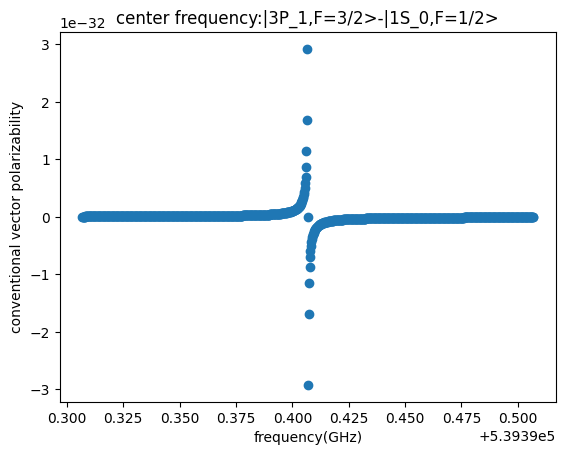

In [7]:
# 极化率随失谐变化 #


# F=3/2态 #

step_num = 1000
wavelen1 = C.c/(omega[1]/(2*pi*10**9)-0.1)
wavelen2 = C.c/(omega[1]/(2*pi*10**9)+0.1)
step = (wavelen2-wavelen1)/step_num
Light_wavelen = [0 for i in range(step_num+1)]
Light_fre = Light_wavelen
y = [0 for i in range(step_num+1)]
for i in range(step_num+1):
    Light_wavelen[i] = wavelen1+step*i  # 光波长
    Light_fre[i] = C.c/((Light_wavelen[i])*1e-9)  # 光圆频率
    y[i] = Alpha_v_F(2*pi*Light_fre[i],omega)  # conventional vector polarizability
    Light_fre[i] = Light_fre[i]*1e-9
plt.figure()
plt.scatter(Light_fre,y)
plt.xlabel("frequency(GHz)")
plt.ylabel("conventional vector polarizability")
plt.title('center frequency:|3P_1,F=3/2>-|1S_0,F=1/2>')
plt.show()


In [8]:
# conventional vector polarizability #


def AlphaKF(light_omega,omega,ProductJ,gamma):
    detune = zeros(len(omega))
    for omega_num in range(len(omega)):
        detune[omega_num] = light_omega - omega[omega_num]
    alpha = zeros(len(K))
    for K_num in range(len(K)):
        term = 0
        for F_num in range(len(F)):
            term = term + (-1)**(F[F_num]+F[0])*(2*F[F_num]+1)*wigner_6j(1,K[K_num],1,F[0],F[F_num],F[0])\
            *(wigner_6j(F[0],1,F[F_num],J[1],I,J[0]))**2\
            *(1/hbar)*(-detune[F_num]/(detune[F_num]**2+(gamma/2)**2))
        alpha[K_num] = ((-1)**(K[K_num]+1))*(2*F[0]+1)*sqrt(2*K[K_num]+1)*(ProductJ**2)*term
    return alpha

def Alpha_V_F(light_omega,omega,ProductJ,gamma):
    alpha_K = AlphaKF(light_omega,omega,ProductJ,gamma)
    alpha_v_F = -sqrt(2*F[0]/((F[0]+1)*(2*F[0]+1)))*alpha_K[1]
    return alpha_v_F

AlphaVF3 = Alpha_V_F(LightOmega,omega,product_J,Gamma[1])  # 3P_1
AlphaVF1 = Alpha_V_F(LightOmega,Omega1,ProductJ1,Gamma[0])  # 1P_1
AlphaVF = AlphaVF1 + AlphaVF3


In [9]:
# Vector Shift #



# Yb-171 #

from sympy.physics.wigner import wigner_3j
from sympy.physics.wigner import wigner_6j
from numpy import*
import matplotlib.pyplot as plt
import scipy.constants as C


# 定义常数 #

hbar = C.h/(2*pi)  # 约化普朗克常数
a0 = 5.2917721067e-11  # 玻尔半径
epsilon0 = 8.854e-12 # 真空介电常数
K = [0,1,2]

J0 = 0
I = 1/2
F0 = 1/2


# Lattice #
LightOmega = 2e9*pi*C.c/1036
P = (16*0.5)*4+16*(1-0.5) # 等效光功率(W)
w0 = 20 # (um)

# EDM ODT #
#P = 10  # optical power [W]
#w0 = 50  # beam waist [um]

I_0 = P*2/(C.c*pi*(w0*1e-6)**2) # 中心光功率密度
epsilon_square = I_0*2/epsilon0 # 电矢量模平方

VShift = (1/4)*epsilon_square*(1/2)*AlphaVF*(1-(-1))
VFreq = VShift/C.h
print('Vector Shift is %.3f Hz\n'%VFreq)


Vector Shift is 16.381 Hz



In [10]:
# Other Transitions #



def AlphaVJF(light_omega,omega,J,F,ProductJSquare):
    
    detune = light_omega - omega
    
    alphaF1 = ((-1)**(K[1]+F0+1+F))*(2*F0+1)*sqrt(2*K[1]+1)\
    *(2*F+1)*wigner_6j(1,K[1],1,F0,F,F0)\
    *wigner_6j(F0,1,F,J,I,J0)**2\
    *ProductJSquare/(-detune*hbar)
    
    #alphaVJ = -sqtr(2*J[0]/((J[0]+1)*(2*J[0]+1)))*alphaJ1
    
    alphaVJF = -1*sqrt(2*F0/((2*F0+1)*(F0+1)))*alphaF1
    
    return alphaVJF


def ProductJSq(J,tau,omega):
    
    para = 3*pi*epsilon0*hbar*(C.c**3)*C.e/(C.e**2)
    ProductSq = para*(2*J+1)/(tau*omega**3)
    
    return ProductSq


def VShiftFreq(alphaVJF):
    
    VShift = -(1/4)*epsilon_square*(1/2)/C.h*alphaVJF*(1-(-1))
    VFreq = VShift
    
    return VFreq


In [11]:
# 6s6p 3P_0 #

J = 0
F = 1/2
tau = 2.26  # [s]
omega = 2*pi*518295836e6  # [Hz]
productJSq = ProductJSq(J,tau,omega)
alphaVJF1 = AlphaVJF(LightOmega,omega,J,F,productJSq)

VFreq1 = VShiftFreq(alphaVJF1)


# 6s6p 3P_1 #

J = 1
F = [1/2,3/2]
tau = 8.611e-7  # [s]
omega = 2*pi*539390407e6  # [Hz]
productJSq = ProductJSq(J,tau,omega)
alphaVJF = AlphaVJF(LightOmega,omega,J,F[0],productJSq)\
    +AlphaVJF(LightOmega,omega,J,F[1],productJSq)

VFreq2 = VShiftFreq(alphaVJF)


# 6s6p 1P_1 #

J = 1
F = [1/2,3/2]
tau = 5.464e-9  # [s]
omega = 2*pi*751526533e6  # [Hz]
productJSq = ProductJSq(J,tau,omega)
alphaVJF = AlphaVJF(LightOmega,omega,J,F[0],productJSq)\
    +AlphaVJF(LightOmega,omega,J,F[1],productJSq)

VFreq3 = VShiftFreq(alphaVJF)


# 6s7s 3S_1 #

J = 1
F = [1/2,3/2]
tau = 1.59e-8  # [s]
omega = 2*pi*980167431e6  # [Hz]
productJSq = ProductJSq(J,tau,omega)
alphaVJF = AlphaVJF(LightOmega,omega,J,F[0],productJSq)\
    +AlphaVJF(LightOmega,omega,J,F[1],productJSq)

VFreq4 = VShiftFreq(alphaVJF)


# 6s7s 1S_0 #

J = 0
F = 1/2
tau = 4.58e-8  # [s]
omega = 2*pi*1029806600e6  # [Hz]
productJSq = ProductJSq(J,tau,omega)
alphaVJF = AlphaVJF(LightOmega,omega,J,F,productJSq)

VFreq5 = VShiftFreq(alphaVJF)


# 6s8s 3S_1 #

J = 1
F = [1/2,3/2]
tau = 3.43e-8  # [s]
omega = 2*pi*1247587500e6  # [Hz]
productJSq = ProductJSq(J,tau,omega)
alphaVJF = AlphaVJF(LightOmega,omega,J,F[0],productJSq)\
    +AlphaVJF(LightOmega,omega,J,F[1],productJSq)

VFreq6 = VShiftFreq(alphaVJF)



In [12]:
print('%.6e'%VFreq2)




0.000000e+00
